In [1]:
# Importing libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PowerTransformer
from scipy.stats import zscore
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import roc_auc_score, roc_curve

import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv(r"D:\Studies\DataScience\DataTrained\DataTrained_Classes\FlipRobo\FlipRobo2\ProjectEvaluation\Phase2\loan_prediction.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
#checking Dimension of Data
print("In our dataset we have {} rows & {} columns".format(*df.shape))
print('\n')

# Column Names in our Dataset
print("These are the columns present in our dataset: \n",df.columns)

In our dataset we have 614 rows & 13 columns


These are the columns present in our dataset: 
 Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [4]:
#Checking datatypes in our dataset
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [5]:
# Checking data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
# Checking for Missing values
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))


                   Missing Values  % Missing data
Credit_History                 50        8.143322
Self_Employed                  32        5.211726
LoanAmount                     22        3.583062
Dependents                     15        2.442997
Loan_Amount_Term               14        2.280130
Gender                         13        2.117264
Married                         3        0.488599
Loan_ID                         0        0.000000
Education                       0        0.000000
ApplicantIncome                 0        0.000000
CoapplicantIncome               0        0.000000
Property_Area                   0        0.000000
Loan_Status                     0        0.000000


In [7]:
# Checking for Missing values
print("Total missing values in our dataframe are: ",df.isnull().sum().sum())


Total missing values in our dataframe are:  149


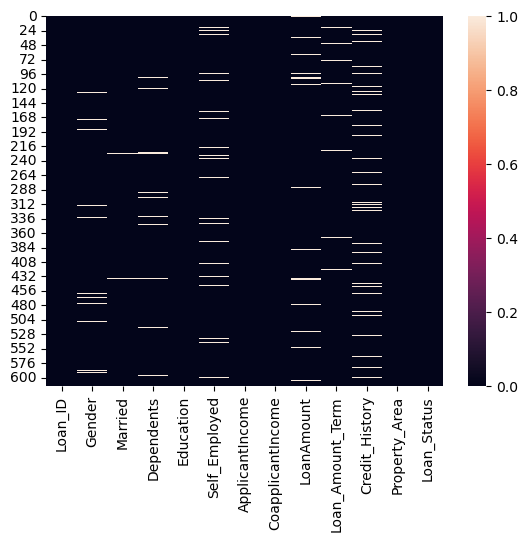

In [8]:
#Visualization it
sns.heatmap(df.isnull())
plt.show()


In [9]:
#Checking for duplicate values in our dataframe
df.duplicated().sum()


0

In [10]:
#Exploring Categorical Column before filling Missing Values
cat_col =['Gender','Married','Dependents','Education','Self_Employed',
          'Loan_Amount_Term','Property_Area','Credit_History','Loan_Status']

for i in cat_col:
    print(i)
    print(df[i].value_counts())
    print('='*100)
    

Gender
Male      489
Female    112
Name: Gender, dtype: int64
Married
Yes    398
No     213
Name: Married, dtype: int64
Dependents
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
Education
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
Self_Employed
No     500
Yes     82
Name: Self_Employed, dtype: int64
Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64
Property_Area
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64
Credit_History
1.0    475
0.0     89
Name: Credit_History, dtype: int64
Loan_Status
Y    422
N    192
Name: Loan_Status, dtype: int64


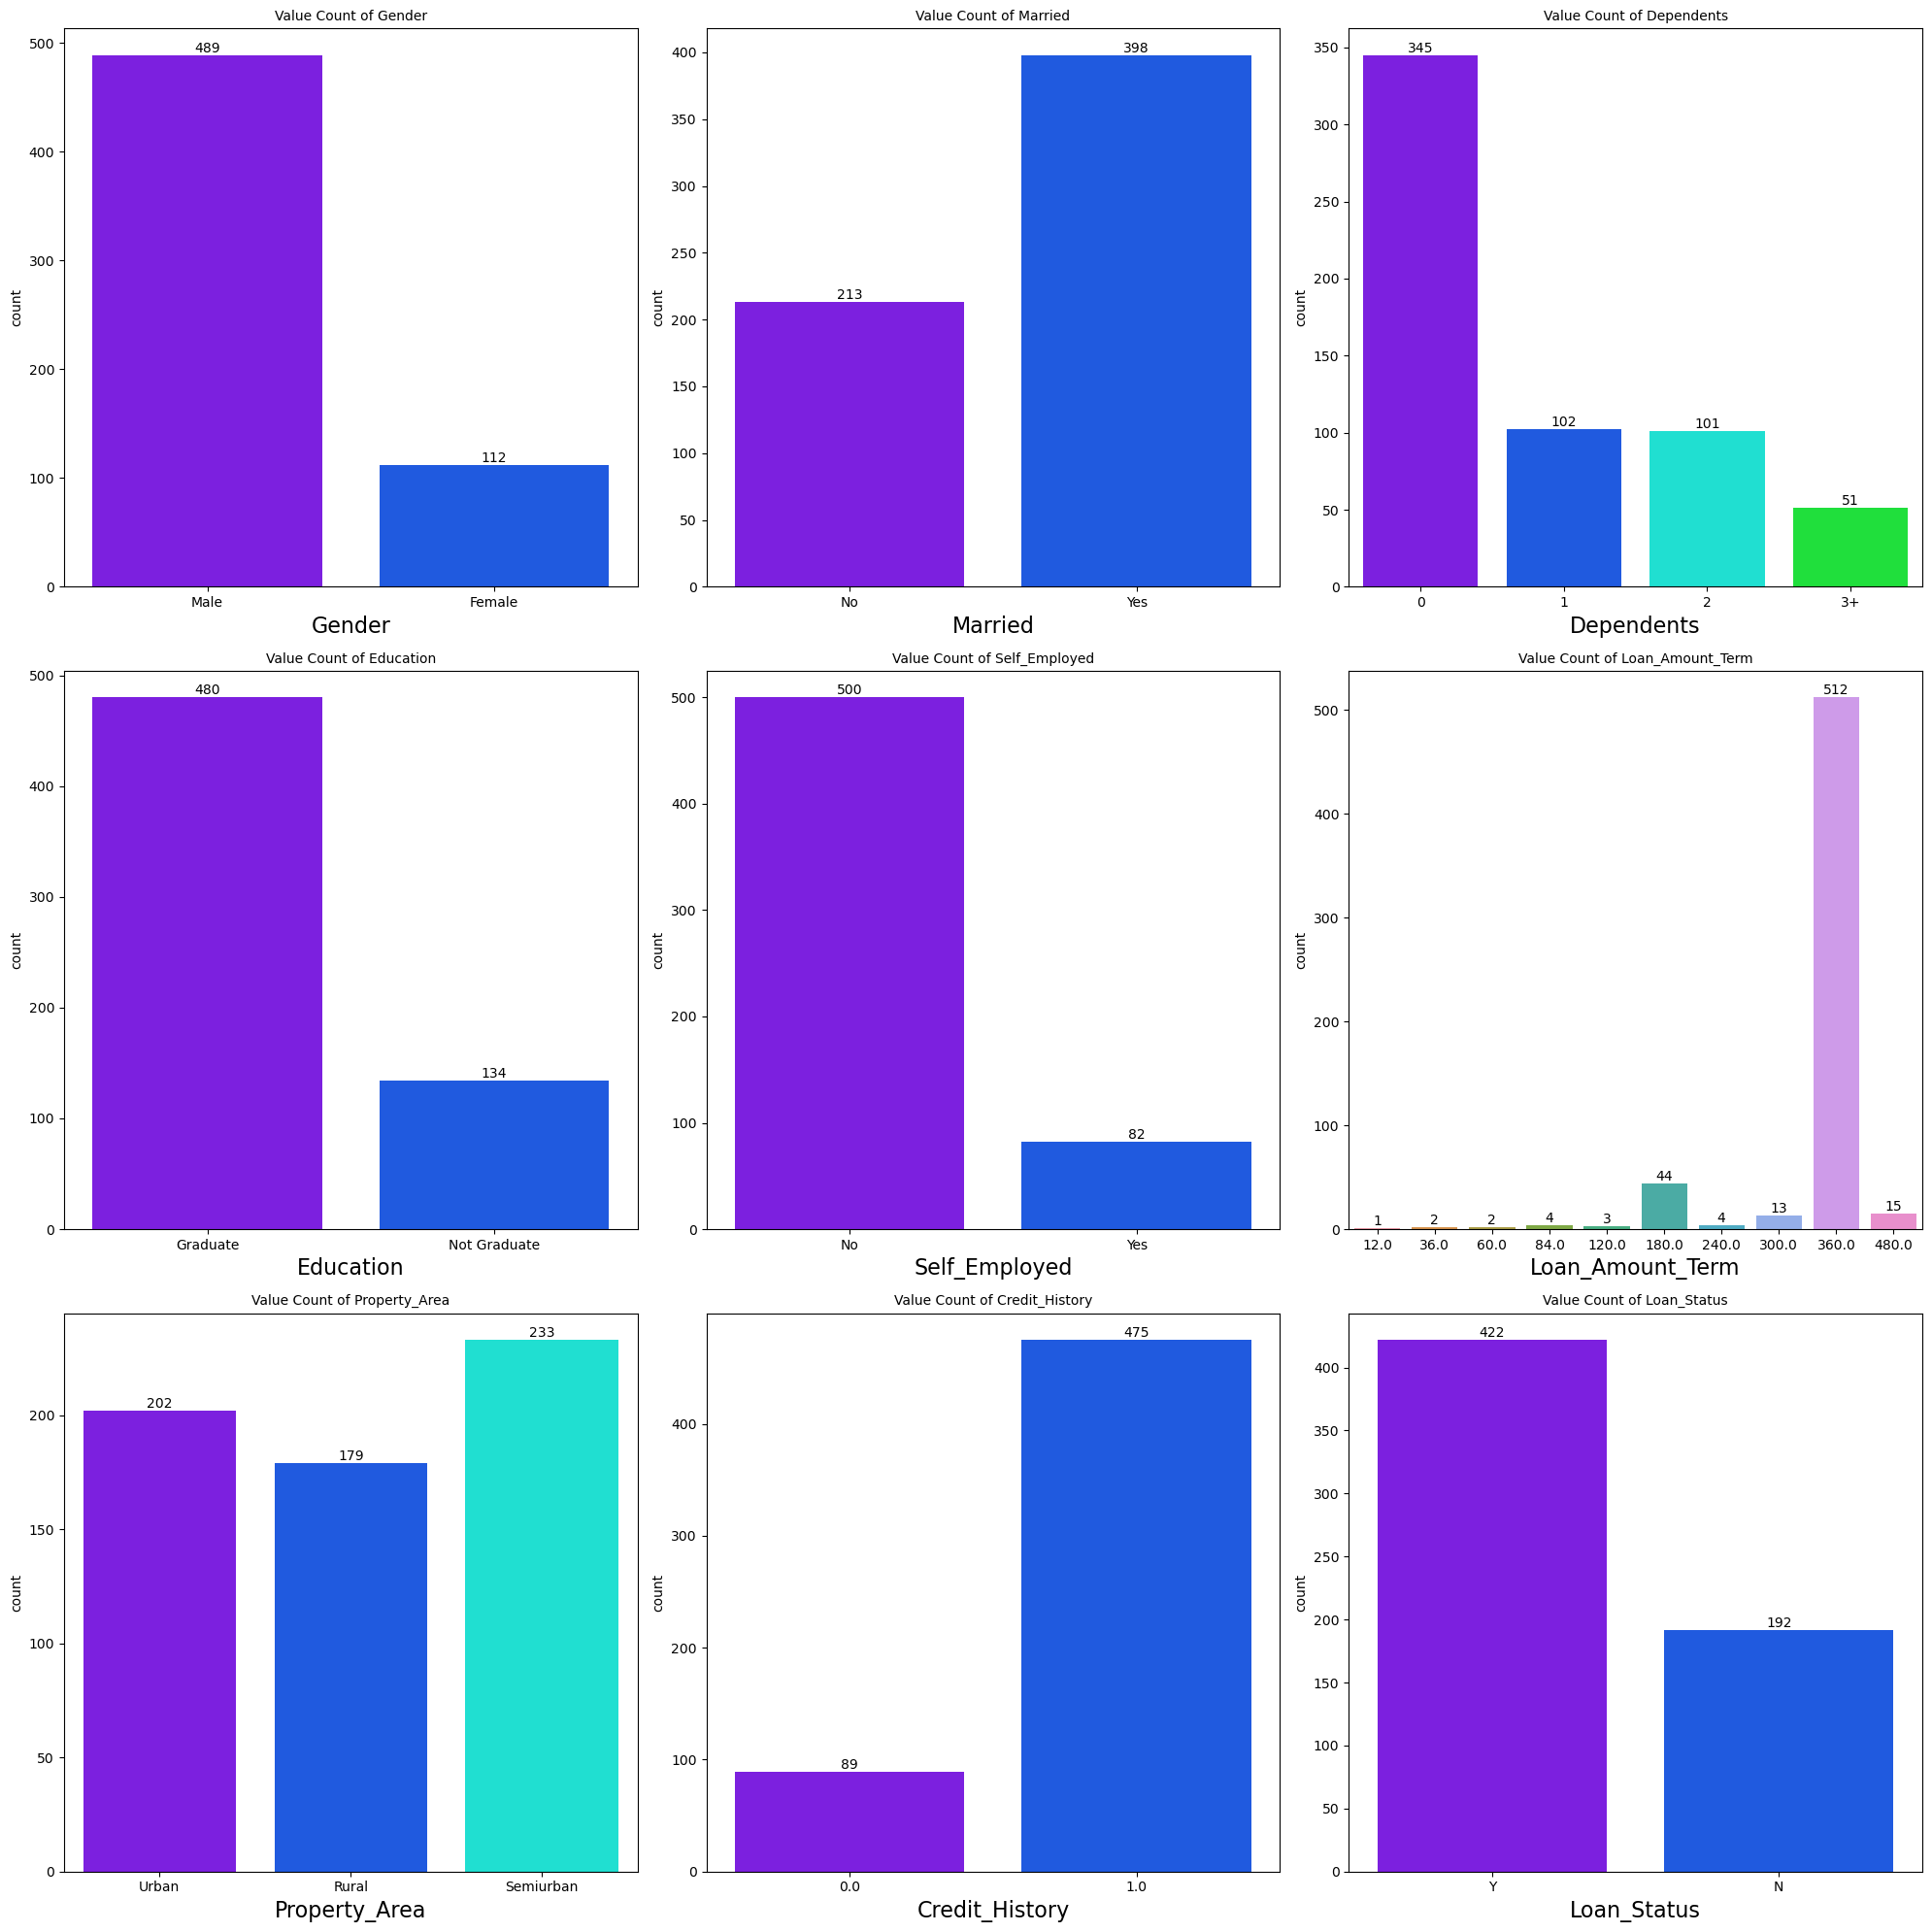

In [11]:
#visualizing it
sns.set_palette('gist_rainbow_r')
plt.figure(figsize=(20,20))
plotnumber=1

#Creating CountPlot
for i, column in enumerate(cat_col):
    if plotnumber <= 9:
        ax=plt.subplot(3,3,plotnumber)
        sns.countplot(x=column, data=df)
        for container in ax.containers:
            ax.bar_label(container)
        plt.xlabel(column, fontsize=16)
        ax.set_title(f'Value Count of {column}', fontsize=10)
    plotnumber+=1
plt.tight_layout()
plt.show()

In [12]:
#Exploring Numerical columns before filling missing Column
num_col=['Loan_ID','ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

for i in num_col:
    print(i)
    print(df[i].value_counts())
    print('='*100)

Loan_ID
LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64
ApplicantIncome
2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: ApplicantIncome, Length: 505, dtype: int64
CoapplicantIncome
0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: CoapplicantIncome, Length: 287, dtype: int64
LoanAmount
120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: LoanAmount, Length: 203, dtype: int64


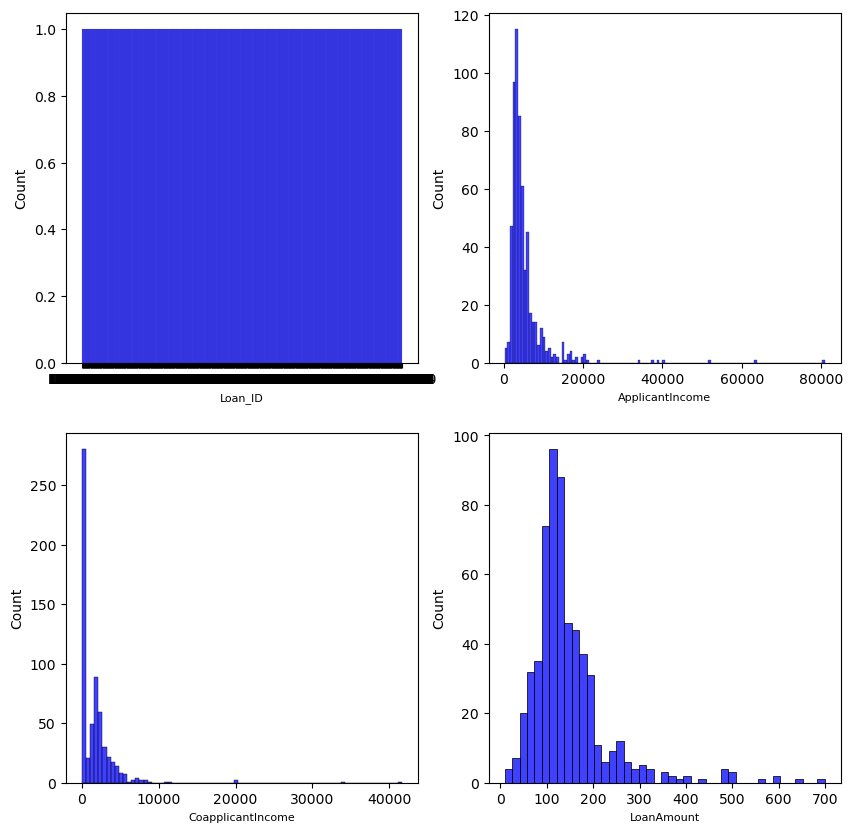

In [13]:
#Visiualizing it using Histogram
plt.figure(figsize=(10,10), facecolor='white')
plotnumber =1
for column in num_col:
    if plotnumber <=4:
        ax = plt.subplot(2,2,plotnumber)
        sns.histplot(df[column], color='b')
        plt.xlabel(column,fontsize=8)
    plotnumber+=1
plt.tight_layout
plt.show()

In [14]:
#Dropping column
df = df.drop("Loan_ID", axis=1)
df.shape

(614, 12)

In [15]:
# Imputating Missing value with mode for categorical features
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)

# Imputation of Numerical features
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)


In [16]:
#checking missing values after imputation
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                   Missing Values  % Missing data
Gender                          0             0.0
Married                         0             0.0
Dependents                      0             0.0
Education                       0             0.0
Self_Employed                   0             0.0
ApplicantIncome                 0             0.0
CoapplicantIncome               0             0.0
LoanAmount                      0             0.0
Loan_Amount_Term                0             0.0
Credit_History                  0             0.0
Property_Area                   0             0.0
Loan_Status                     0             0.0


In [17]:
#Statistical summary of Numerical columns
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [18]:
#Statistical summary of Categorical columns
df.describe(include='object')

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,614,614,614,614,614,614
unique,2,2,4,2,2,3,2
top,Male,Yes,0,Graduate,No,Semiurban,Y
freq,502,401,360,480,532,233,422


Y    422
N    192
Name: Loan_Status, dtype: int64


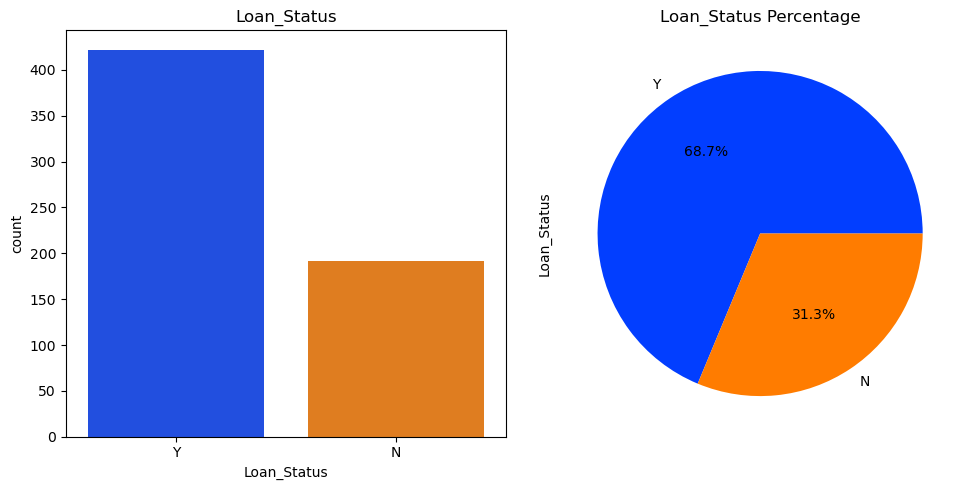

In [19]:
# Exploring our Target Column
print(df['Loan_Status'].value_counts())

#Visualizing it
fig,axes =plt.subplots(1,2, figsize=(10,5))
sns.set_palette("bright")

# First plot: Count Plot
sns.countplot(x='Loan_Status', data=df, ax=axes[0])
axes[0].set_title("Loan_Status")

# Second Plot: Percentage count
df['Loan_Status'].value_counts().plot(kind='pie', autopct='%0.1f%%', ax=axes[1])
axes[1].set_title("Loan_Status Percentage")

plt.tight_layout()
plt.show()

In [20]:
#Removing Loan_status variable from categorical list
cat_col=cat_col[:-1]

# Iterate through each categorical column
for col in cat_col:
    
    # Group by 'Loan_status' and the current categorical column
    Loan_Status_counts = df.groupby(['Loan_Status', col])[col].count()
    
    # Calculate the total count for each category in the current column
    total_counts = df.groupby(col)['Loan_Status'].count()
    
    # Calculate the percentage of 'Loan_Status' for each category in the current column
    loan_percentages = (Loan_Status_counts / total_counts * 100).round(2)
    
    # Create a DataFrame to display the counts and percentages
    loan_df = pd.concat([Loan_Status_counts, loan_percentages], axis=1, keys=['Count', 'Percentage'])
    
    # Print the results
    print(loan_df)
    print('*'*60)

                    Count  Percentage
Loan_Status Gender                   
N           Female     37       33.04
            Male      155       30.88
Y           Female     75       66.96
            Male      347       69.12
************************************************************
                     Count  Percentage
Loan_Status Married                   
N           No          79       37.09
            Yes        113       28.18
Y           No         134       62.91
            Yes        288       71.82
************************************************************
                        Count  Percentage
Loan_Status Dependents                   
N           0             113       31.39
            1              36       35.29
            2              25       24.75
            3+             18       35.29
Y           0             247       68.61
            1              66       64.71
            2              76       75.25
            3+             33       64

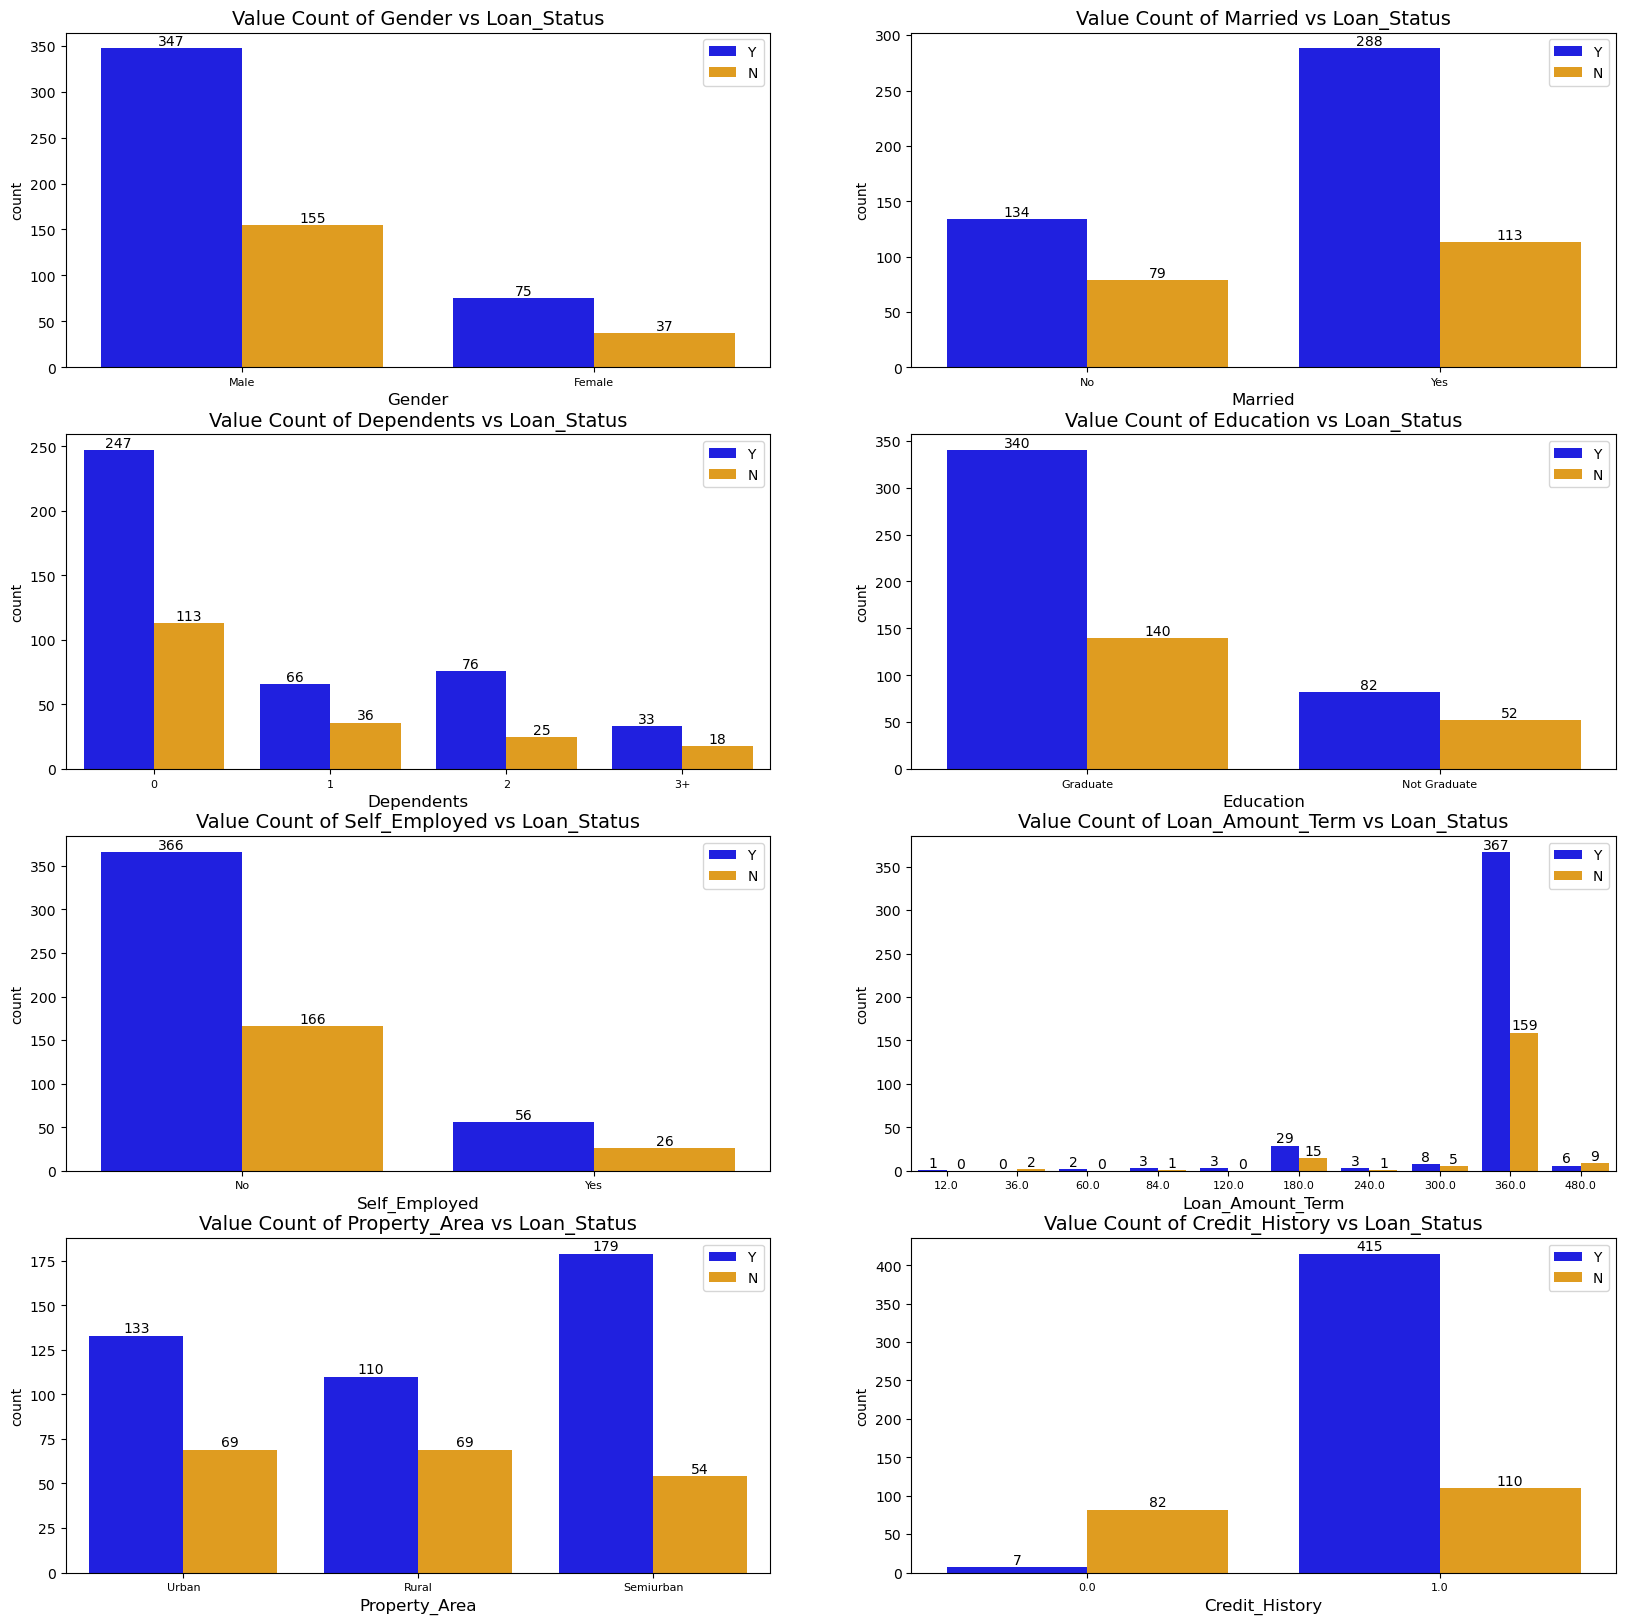

In [21]:
plt.figure(figsize=(20, 20))
p = 1

for i in cat_col:
    if p <= 8:
        plt.subplot(4, 2, p)
        custom_palette = {"Y": "b", "N": "orange"}
        ax = sns.countplot(x=i, hue='Loan_Status', data=df, palette=custom_palette)
        for container in ax.containers:
            ax.bar_label(container)
        plt.title(f'Value Count of {i} vs Loan_Status', fontsize=14)
        plt.xlabel(i, fontsize=12)
        plt.xticks(fontsize=8)
        plt.legend()
    p += 1
plt.show()

In [22]:
num_col = num_col[1:]

# Iterate through each categorical column
for col in num_col:
    # Group by 'Loan_Status' and the Numerical column
    Loan_Status_counts = df.groupby(['Loan_Status', col])[col].count()
    
    # Calculate the total count for each category in the current column
    total_counts = df.groupby(col)['Loan_Status'].count()
    
    # Calculate the percentage of 'Attrition' for each category in the current column
    Loan_Status_percentages = (Loan_Status_counts / total_counts * 100).round(2)
    
    # Create a DataFrame to display the counts and percentages
    Loan_Status_df = pd.concat([Loan_Status_counts, Loan_Status_percentages], axis=1, keys=['Count', 'Percentage'])
    
    # Print the results
    print(Loan_Status_df)
    print('\n')

                             Count  Percentage
Loan_Status ApplicantIncome                   
N           150                  1       100.0
            416                  1       100.0
            1000                 1       100.0
            1378                 1       100.0
            1442                 1       100.0
...                            ...         ...
Y           37719                1       100.0
            39147                1       100.0
            39999                1       100.0
            51763                1       100.0
            63337                1       100.0

[536 rows x 2 columns]


                               Count  Percentage
Loan_Status CoapplicantIncome                   
N           0.0                   96       35.16
            536.0                  1      100.00
            736.0                  1      100.00
            1000.0                 1      100.00
            1250.0                 1       50.00
...                 

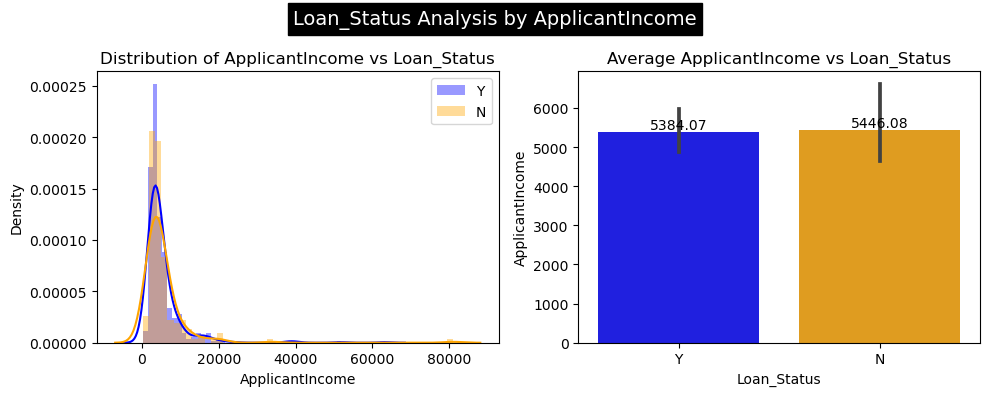

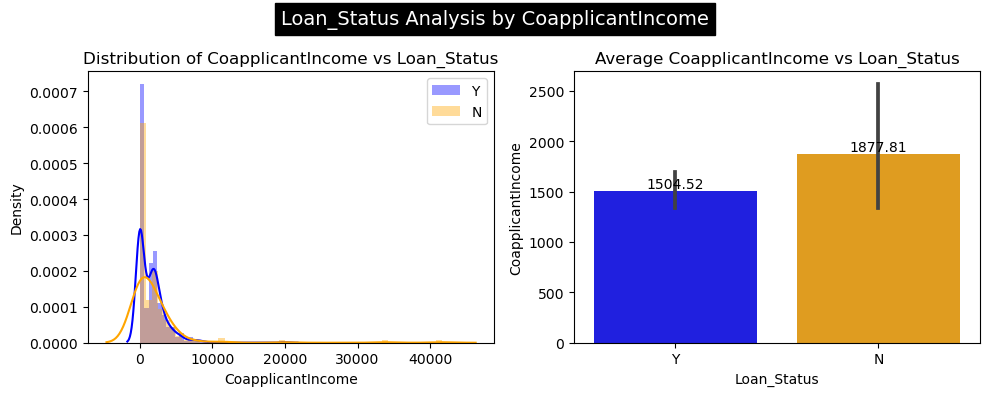

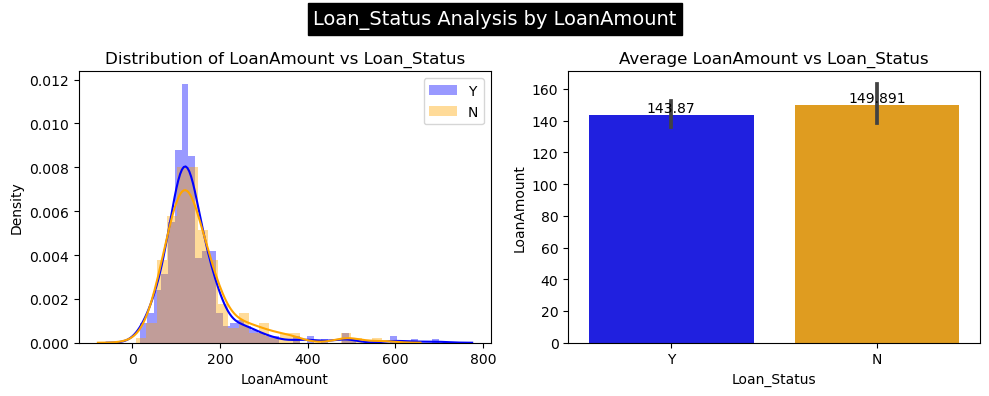

In [23]:
# Iterate over numerical columns
for col in num_col:
    
    # Create subplots
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))
    
    # First Plot: Distribution of Numerical columns vs Loan_Status
    sns.distplot(df[df['Loan_Status'] == 'Y' ][col], label='Y', color='b', ax=axes[0])
    sns.distplot(df[df['Loan_Status'] == 'N'][col], label='N', color='orange', ax=axes[0])
    axes[0].set_title(f"Distribution of {col} vs Loan_Status")
    axes[0].legend()
    
    # Second Plot: Avg. Numerical columns vs Loan_Status
    ax = sns.barplot(x='Loan_Status', y=col, data=df, palette={'Y': "b", 'N': "orange"}, ax=axes[1])
    for container in ax.containers:
        ax.bar_label(container)
    axes[1].set_title(f'Average {col} vs Loan_Status')
    
    fig.suptitle(f"Loan_Status Analysis by {col}", fontsize=14, backgroundcolor='black', color='white')
    
    # Adjust layout to prevent overlapping
    plt.tight_layout()
    # Show the plots
    plt.show()

In [24]:
cross_tab= pd.crosstab([df['Gender'],df['Married']],[df.Loan_Status],margins=True)
cross_tab

Loan_Status       N    Y  All
Gender Married               
Female No        29   51   80
       Yes        8   24   32
Male   No        50   83  133
       Yes      105  264  369
All             192  422  614

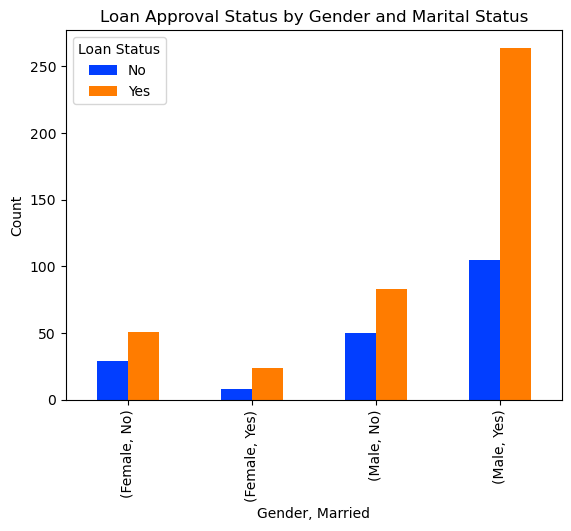

In [25]:
# Plot a grouped bar chart
cross_tab.iloc[:-1,:-1].plot(kind='bar', legend=False)
plt.title('Loan Approval Status by Gender and Marital Status')
plt.xlabel('Gender, Married')
plt.ylabel('Count')
plt.legend(title='Loan Status', labels=['No', 'Yes'])

plt.show()

In [26]:
cross_tab1=pd.crosstab([df['Dependents']],[df.Loan_Status,df['Gender']],margins=True)
cross_tab1

Loan_Status      N           Y       All
Gender      Female Male Female Male     
Dependents                              
0               27   86     56  191  360
1                6   30     13   53  102
2                2   23      5   71  101
3+               2   16      1   32   51
All             37  155     75  347  614

In [27]:
pd.crosstab([df['Dependents'],df['Gender']],[df.Loan_Status],margins=True)

Loan_Status          N    Y  All
Dependents Gender               
0          Female   27   56   83
           Male     86  191  277
1          Female    6   13   19
           Male     30   53   83
2          Female    2    5    7
           Male     23   71   94
3+         Female    2    1    3
           Male     16   32   48
All                192  422  614

In [28]:
pd.crosstab([df['Dependents']],[df.Loan_Status,df['Gender']],margins=True)

Loan_Status      N           Y       All
Gender      Female Male Female Male     
Dependents                              
0               27   86     56  191  360
1                6   30     13   53  102
2                2   23      5   71  101
3+               2   16      1   32   51
All             37  155     75  347  614

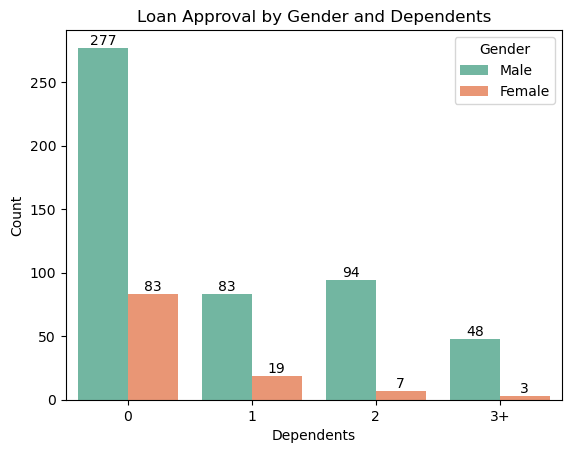

In [29]:
# Create a countplot
ax= sns.countplot(data=df, x='Dependents', hue='Gender', palette='Set2')
for container in ax.containers:
        ax.bar_label(container)
# Add labels and a title
plt.xlabel('Dependents')
plt.ylabel('Count')
plt.title('Loan Approval by Gender and Dependents')

# Show the plot
plt.show()

In [30]:
pd.crosstab([df['Education'],df['Gender']],[df.Loan_Status],margins=True)

Loan_Status            N    Y  All
Education    Gender               
Graduate     Female   31   61   92
             Male    109  279  388
Not Graduate Female    6   14   20
             Male     46   68  114
All                  192  422  614

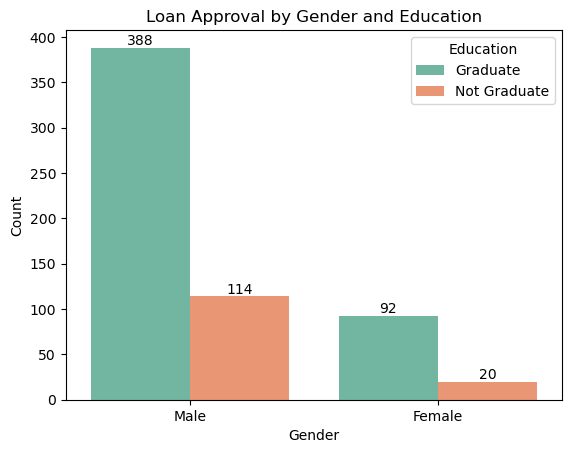

In [31]:
# Create a countplot
ax= sns.countplot(data=df, x='Gender', hue='Education', palette='Set2', hue_order=['Graduate', 'Not Graduate'])
for container in ax.containers:
        ax.bar_label(container)
# Add labels and a title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Loan Approval by Gender and Education')

# Show the plot
plt.show()

In [32]:
#Initiating Label Encoder
le = LabelEncoder()

for i in cat_col:
    df[i] = le.fit_transform(df[i])

#Encoding our target column
df['Loan_Status']=le.fit_transform(df['Loan_Status'])

In [33]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,8,1,2,1
1,1,1,1,0,0,4583,1508.0,128.0,8,1,0,0
2,1,1,0,0,1,3000,0.0,66.0,8,1,2,1
3,1,1,0,1,0,2583,2358.0,120.0,8,1,2,1
4,1,0,0,0,0,6000,0.0,141.0,8,1,2,1


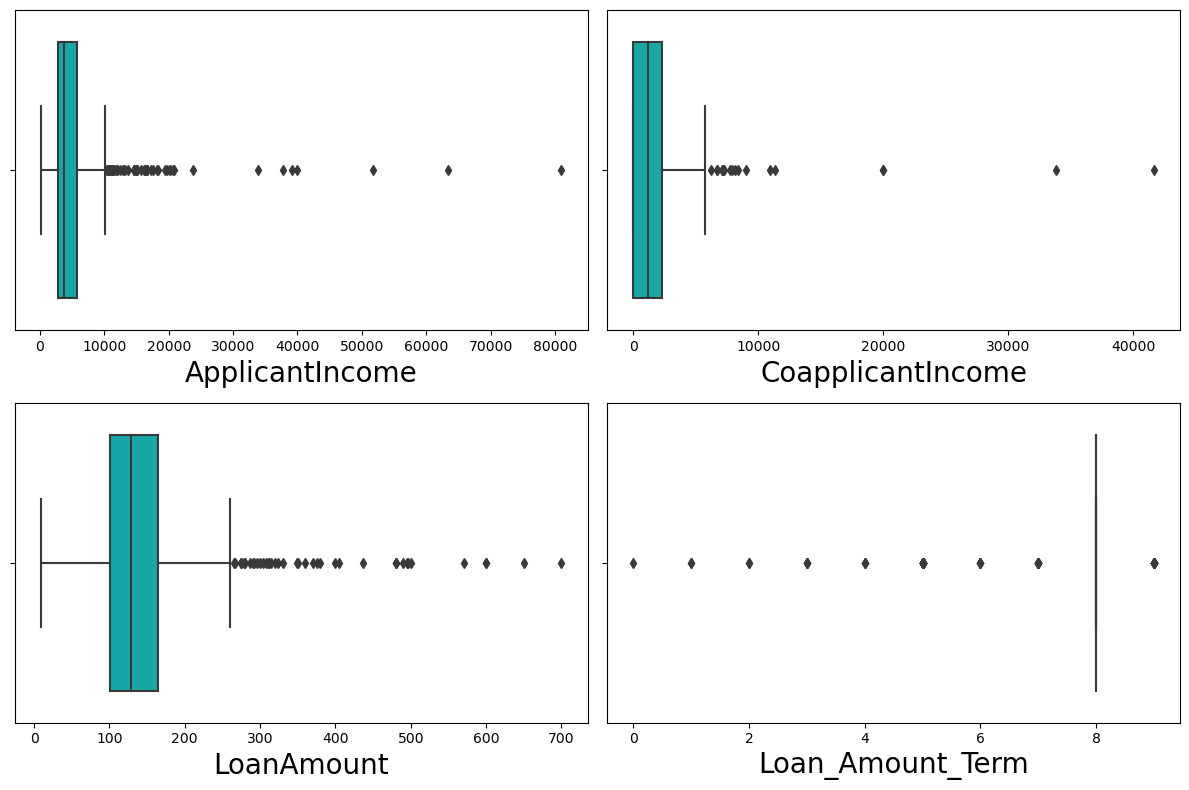

In [34]:
# Outliers Detection and Removal
outliers =['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']

plt.figure(figsize=(12,8))
plotnumber=1

for column in outliers:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(x=df[column],color='c')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

In [35]:
#Removing Outliers
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

# reassigning the changed dataframe name to our original dataframe name
df=df1.copy()

Shape of the dataframe before removing outliers:  (614, 12)
Shape of the dataframe after removing outliers:  (577, 12)
Percentage of data loss post outlier removal:  6.026058631921824


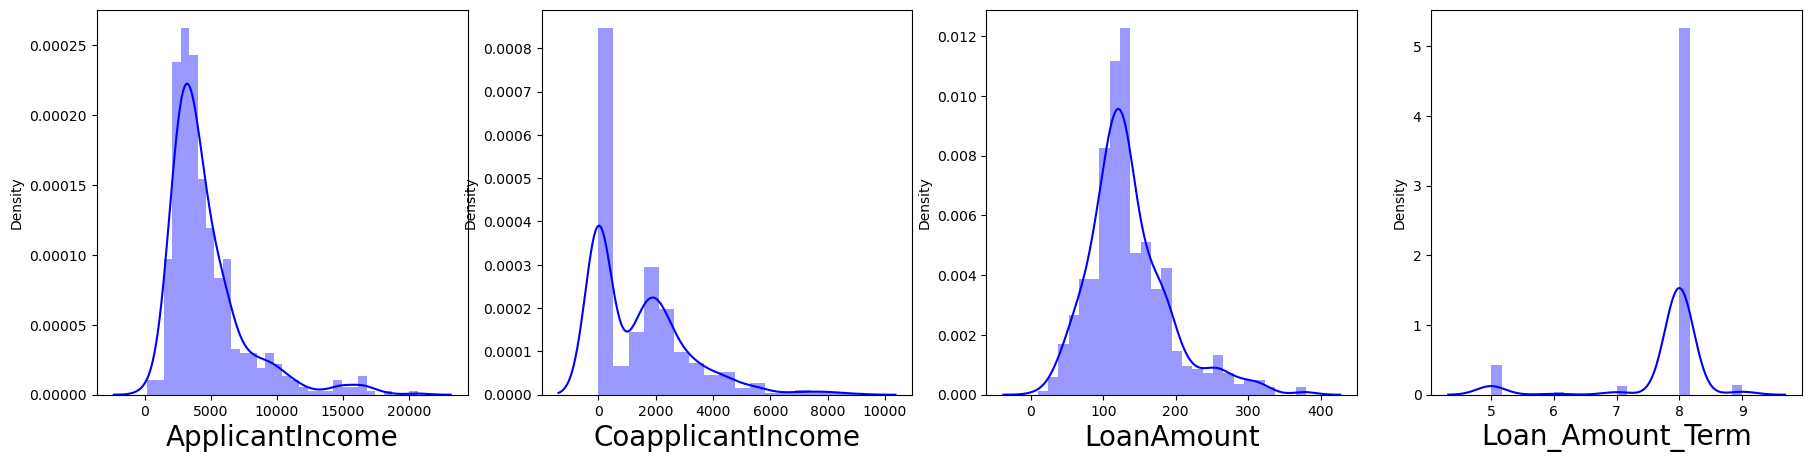

In [36]:
plt.figure(figsize=(22,5))
plotnum=1
for col in outliers:
    if plotnum<=4:
        plt.subplot(1,4,plotnum)
        sns.distplot(df[col],color='b')
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

In [37]:
df.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.151525
Loan_Amount_Term    -2.818252
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

In [38]:
# Removing skewness using yeo-johnson  method to get better prediction
skew = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

#Initating Scaler
scaler = PowerTransformer(method='yeo-johnson')

df[skew] = scaler.fit_transform(df[skew].values)
df[skew].head()

,ApplicantIncome,CoapplicantIncome,LoanAmount
0,0.681780,-1.122446,0.000771
1,0.234783,0.744117,0.000771
2,-0.527201,-1.122446,-1.437336
3,-0.791972,0.895786,-0.153545
4,0.728848,-1.122446,0.238260


In [39]:
#Checking skewness after removing it
df.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      0.027981
CoapplicantIncome   -0.191876
LoanAmount           0.048425
Loan_Amount_Term    -2.818252
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

In [40]:
dfcor=df.corr()
dfcor

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.378997,0.188162,0.045696,-0.006207,0.058590,0.234551,0.172146,-0.103679,0.013172,-0.026340,0.017408
Married,0.378997,1.000000,0.329900,0.024817,-0.015779,-0.024783,0.335820,0.181878,-0.121261,0.019308,0.010595,0.089026
Dependents,0.188162,0.329900,1.000000,0.069814,0.044543,0.105994,0.004109,0.131772,-0.088274,-0.020288,0.002327,0.017872
Education,0.045696,0.024817,0.069814,1.000000,-0.007139,-0.176074,0.049739,-0.128715,-0.100207,-0.075217,-0.068596,-0.092658
Self_Employed,-0.006207,-0.015779,0.044543,-0.007139,1.000000,0.212260,-0.087338,0.117218,-0.023570,-0.016390,-0.028253,-0.026525
ApplicantIncome,0.058590,-0.024783,0.105994,-0.176074,0.212260,1.000000,-0.360946,0.432154,-0.056331,0.028825,-0.011364,-0.002484
CoapplicantIncome,0.234551,0.335820,0.004109,0.049739,-0.087338,-0.360946,1.000000,0.200081,0.001821,0.006564,-0.074476,0.079344
LoanAmount,0.172146,0.181878,0.131772,-0.128715,0.117218,0.432154,0.200081,1.000000,0.060734,-0.003626,-0.098090,-0.023609
Loan_Amount_Term,-0.103679,-0.121261,-0.088274,-0.100207,-0.023570,-0.056331,0.001821,0.060734,1.000000,0.040500,-0.067388,-0.000088
Credit_History,0.013172,0.019308,-0.020288,-0.075217,-0.016390,0.028825,0.006564,-0.003626,0.040500,1.000000,-0.008121,0.560936


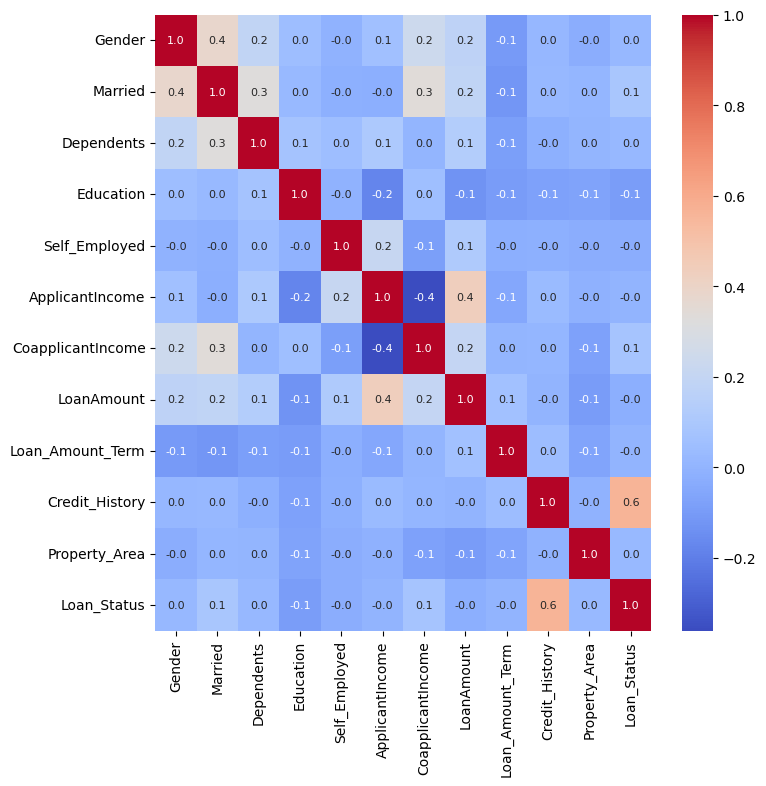

In [41]:
#visualizing it
plt.figure(figsize=(8, 8))
sns.heatmap(dfcor, annot=True, fmt='.1F', cmap='coolwarm', annot_kws={"size": 8})
plt.show()

In [42]:
#correlation with target column
correlation_with_target = df.corr()['Loan_Status'].abs().sort_values(ascending=False)
print(correlation_with_target)

Loan_Status          1.000000
Credit_History       0.560936
Education            0.092658
Married              0.089026
CoapplicantIncome    0.079344
Self_Employed        0.026525
Property_Area        0.026507
LoanAmount           0.023609
Dependents           0.017872
Gender               0.017408
ApplicantIncome      0.002484
Loan_Amount_Term     0.000088
Name: Loan_Status, dtype: float64


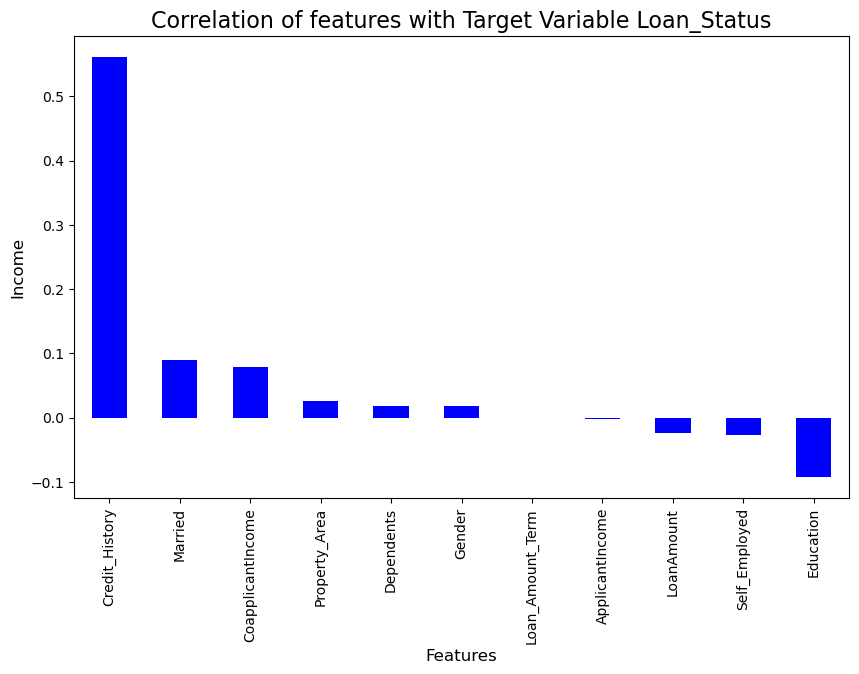

In [43]:
plt.figure(figsize = (10,6))
df.corr()['Loan_Status'].drop(['Loan_Status']).sort_values(ascending=False).plot(kind='bar',color = 'blue')
plt.xlabel('Features',fontsize=12)
plt.ylabel('Income',fontsize=12)
plt.title('Correlation of features with Target Variable Loan_Status',fontsize = 16)
plt.show()

In [44]:
# Dropping the column which has least correlation with target
df.drop(columns=['Loan_Amount_Term', 'ApplicantIncome'], inplace=True)

df.shape

(577, 10)

In [45]:
vif= pd.DataFrame()
vif['VIF']= [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
vif['Features']= df.columns
vif

,VIF,Features
0,5.101363,Gender
1,3.920692,Married
2,1.776292,Dependents
3,1.313801,Education
4,1.161673,Self_Employed
5,1.197988,CoapplicantIncome
6,1.136072,LoanAmount
7,7.296006,Credit_History
8,2.418983,Property_Area
9,4.811789,Loan_Status


In [46]:
# Splitting data in target and dependent feature
X = df.drop(['Loan_Status'], axis =1)
Y = df['Loan_Status']

In [47]:
X.shape, Y.shape

((577, 9), (577,))

In [48]:
Y.value_counts()

1    398
0    179
Name: Loan_Status, dtype: int64

In [49]:
# Balancing Imbalance data using oversampling method SMOTE

oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

In [50]:
Y.value_counts()

1    398
0    398
Name: Loan_Status, dtype: int64

In [51]:
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

In [52]:
# Initialize all the classification models
LR_model = LogisticRegression()
DT_model = DecisionTreeClassifier()
SV_model = SVC()
KNR_model = KNeighborsClassifier()
RFR_model = RandomForestClassifier()
GNB_model = GaussianNB()
ET_model = ExtraTreesClassifier()

# Create a list of models for iteration
classification_models = [
    (LR_model, "Logistic Regression"),
    (DT_model, "Decision Tree Classifier"),
    (SV_model, "Support Vector Classifier"),
    (KNR_model, "K-Neighbors Classifier"),
    (RFR_model, "Random Forest Classifier"),
    (GNB_model, "GaussianNB"),
    (ET_model, "ExtraTrees Classifier"),
]

# List to store model performance dictionaries
model_performances = []

# Iterate over the models and evaluate them using cross-validation
for model, model_name in classification_models:
    best_random_state = 0
    best_accuracy = 0
    
    for random_state in range(1, 101):  # Try different random states
        cross_val_scores = cross_val_score(model, X, Y, cv=5)
        mean_accuracy = np.mean(cross_val_scores)

        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=random_state)
        model.fit(X_train, Y_train)
        Y_pred = model.predict(X_test)
        accuracy = accuracy_score(Y_test, Y_pred)

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_random_state = random_state

    # Now, calculate the model's performance metrics using the best random state
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=best_random_state)
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)

    accuracy = accuracy_score(Y_test, Y_pred)
    conf_matrix = confusion_matrix(Y_test, Y_pred)
    classification_rep = classification_report(Y_test, Y_pred, output_dict=True)

    precision = classification_rep['weighted avg']['precision']
    recall = classification_rep['weighted avg']['recall']
    f1_score = classification_rep['weighted avg']['f1-score']
    support = classification_rep['weighted avg']['support']

    model_performance = {
        "Model": model_name,
        "Best Random State": best_random_state,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1_score,
        "Support": support,
        "Confusion Matrix": [conf_matrix.tolist()]
    }

    model_performances.append(model_performance)

# Create a DataFrame from the model performance list
model_performance_df = pd.DataFrame(model_performances)

# Sort the models by accuracy in descending order
model_performance_df = model_performance_df.sort_values(by="Accuracy", ascending=False)
model_performance_df

,Model,Best Random State,Accuracy,Precision,Recall,F1-Score,Support,Confusion Matrix
6,ExtraTrees Classifier,6,0.849372,0.849672,0.849372,0.849462,239.0,"[[[93, 17], [19, 110]]]"
4,Random Forest Classifier,12,0.828452,0.829894,0.828452,0.827375,239.0,"[[[83, 26], [15, 115]]]"
2,Support Vector Classifier,86,0.820084,0.822152,0.820084,0.817721,239.0,"[[[74, 29], [14, 122]]]"
0,Logistic Regression,78,0.815900,0.831333,0.815900,0.811488,239.0,"[[[74, 36], [8, 121]]]"
5,GaussianNB,86,0.815900,0.855471,0.815900,0.804638,239.0,"[[[60, 43], [1, 135]]]"
3,K-Neighbors Classifier,61,0.803347,0.803144,0.803347,0.803118,239.0,"[[[107, 22], [25, 85]]]"
1,Decision Tree Classifier,68,0.782427,0.802832,0.782427,0.783319,239.0,"[[[89, 13], [39, 98]]]"


In [53]:
# Select the top three models
top_three_models = model_performance_df.head(3)
top_three_models

,Model,Best Random State,Accuracy,Precision,Recall,F1-Score,Support,Confusion Matrix
6,ExtraTrees Classifier,6,0.849372,0.849672,0.849372,0.849462,239.0,"[[[93, 17], [19, 110]]]"
4,Random Forest Classifier,12,0.828452,0.829894,0.828452,0.827375,239.0,"[[[83, 26], [15, 115]]]"
2,Support Vector Classifier,86,0.820084,0.822152,0.820084,0.817721,239.0,"[[[74, 29], [14, 122]]]"


In [54]:
#Data splitting for train and test Data

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=86)

# Define the hyperparameters to search
param_grid = {
    'n_estimators': [50, 100, 200], 
    'max_depth': [None, 10, 20, 30], 
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
}

# Create a GridSearchCV instance
grid_search = GridSearchCV(estimator=ET_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model to find the best parameters
grid_search.fit(X_train, Y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Create a classifier with the best parameters
best_ET = ExtraTreesClassifier(**best_params)

# Fit the best classifier on the training data
best_ET.fit(X_train, Y_train)

# Make predictions on the test data
Y_pred_ET = best_ET.predict(X_test)

# Evaluate the best model
accuracy = accuracy_score(Y_test, Y_pred_ET)
print("Best Accuracy:", accuracy)


Best Accuracy: 0.8326359832635983


In [55]:
#Data splitting for train and test Data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=53)

# Define the parameter grid to search
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'degree': [2, 3, 4],
    'gamma': ['scale', 'auto', 0.1, 1],
    'class_weight': [None, 'balanced']
}

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(estimator=SV_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model to find the best parameters
grid_search.fit(X_train, Y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Create a classifier with the best parameters
best_SVC = SVC(**best_params)

# Fit the best classifier on the training data
best_SVC.fit(X_train, Y_train)

# Make predictions on the test data
Y_pred_SVC = best_SVC.predict(X_test)

# Evaluate the best model
accuracy = accuracy_score(Y_test, Y_pred_SVC)
print("Best Accuracy:", accuracy)

Best Accuracy: 0.799163179916318


In [56]:
# Define the hyperparameters to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Initialize GridSearchCV with the classifier and hyperparameter grid
grid_search = GridSearchCV(estimator=RFR_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model to find the best parameters
grid_search.fit(X_train, Y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Create a classifier with the best parameters
best_rf = RandomForestClassifier(**best_params)

# Fit the best classifier on the training data
best_rf.fit(X_train, Y_train)

# Make predictions on the test data
Y_pred_rf = best_rf.predict(X_test)

# Evaluate the best model
accuracy = accuracy_score(Y_test, Y_pred_rf)
print("Best Accuracy:", accuracy)


Best Accuracy: 0.8075313807531381


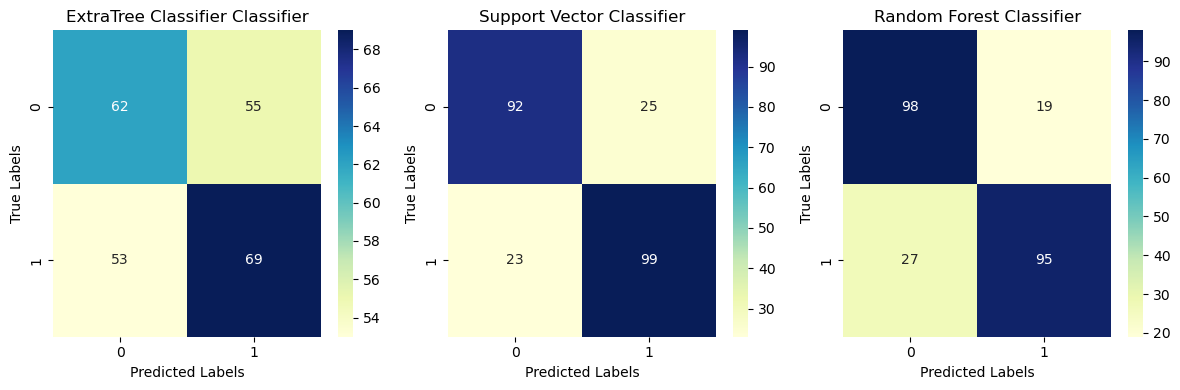

In [57]:
cm_ET = confusion_matrix(Y_test, Y_pred_ET)
cm_SVC = confusion_matrix(Y_test, Y_pred_SVC)
cm_rf = confusion_matrix(Y_test, Y_pred_rf)

# Create subplots for the confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Plot ExtraTree Classifier Confusion Matrix
sns.heatmap(cm_ET, annot=True, fmt="d", cmap="YlGnBu", ax=axes[0])
axes[0].set_title('ExtraTree Classifier Classifier')
axes[0].set_xlabel('Predicted Labels')
axes[0].set_ylabel('True Labels')

# Plot Support Vector Classifier Confusion Matrix
sns.heatmap(cm_SVC, annot=True, fmt="d", cmap="YlGnBu", ax=axes[1])
axes[1].set_title('Support Vector Classifier')
axes[1].set_xlabel('Predicted Labels')
axes[1].set_ylabel('True Labels')

# Plot Random Forest Classifier Confusion Matrix
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="YlGnBu", ax=axes[2])
axes[2].set_title('Random Forest Classifier')
axes[2].set_xlabel('Predicted Labels')
axes[2].set_ylabel('True Labels')

plt.tight_layout()
plt.show()

In [58]:
# Calculate ROC AUC Score for ExtraTree Classifier
y_prob_ET = best_ET.predict_proba(X_test)[:, 1]
auc_score_ET = roc_auc_score(Y_test, y_prob_ET)
print("ROC AUC Score Of ExtraTree Classifier:", auc_score_ET)

# Calculate ROC AUC Score for Support Vector Classifier (SVC)
y_prob_SVC = best_SVC.decision_function(X_test)  # For SVC, use decision_function
auc_score_SVC = roc_auc_score(Y_test, y_prob_SVC)
print("ROC AUC Score Of Support Vector Classifier:", auc_score_SVC)

# Calculate ROC AUC Score for Random Forest Classifier
y_prob_RF = best_rf.predict_proba(X_test)[:, 1]
auc_score_RF = roc_auc_score(Y_test, y_prob_RF)
print("ROC AUC Score Of Random Forest Classifier:", auc_score_RF)


ROC AUC Score Of ExtraTree Classifier: 0.9898416701695391
ROC AUC Score Of Support Vector Classifier: 0.860095278128065
ROC AUC Score Of Random Forest Classifier: 0.8975059548830041


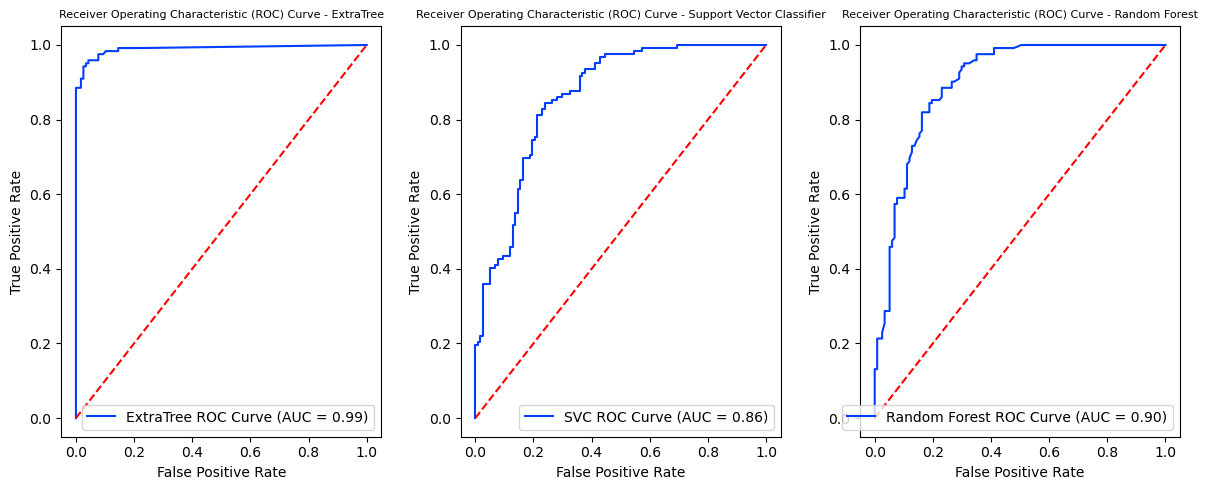

In [59]:
# Calculate ROC curves for both classifiers
fpr_ET, tpr_ET, _ = roc_curve(Y_test, y_prob_ET)
fpr_SVC, tpr_SVC, _ = roc_curve(Y_test, y_prob_SVC)
fpr_RF, tpr_RF, _ = roc_curve(Y_test, y_prob_RF)

# Create subplots
plt.figure(figsize=(12, 5))

# Plot ROC curve for ExtraTree Classifier
plt.subplot(1, 3, 1)
plt.plot(fpr_ET, tpr_ET, label='ExtraTree ROC Curve (AUC = {:.2f})'.format(auc_score_ET))
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - ExtraTree', fontsize=8)
plt.legend(loc='lower right')

# Plot ROC curve for Support Vector Classifier
plt.subplot(1, 3, 2)
plt.plot(fpr_SVC, tpr_SVC, label='SVC ROC Curve (AUC = {:.2f})'.format(auc_score_SVC))
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Support Vector Classifier',fontsize=8)
plt.legend(loc='lower right')

# Plot ROC curve for Random Forest Classifier
plt.subplot(1, 3, 3)
plt.plot(fpr_RF, tpr_RF, label='Random Forest ROC Curve (AUC = {:.2f})'.format(auc_score_RF))
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Random Forest',fontsize=8)
plt.legend(loc='lower right')

# Adjust layout and show plots
plt.tight_layout()
plt.show()


In [60]:
# Saving model
import pickle

filename = 'LoanStatus_model.pkl'
pickle.dump(best_ET, open(filename, 'wb'))